In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

___
## Call the data sets

In [2]:
air = wrangle.clean_air()
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered
0,2021-05-16 00:01:26,8,7,8,0,0,0,0,None


In [3]:
air = air.replace(to_replace=-999, value=0)

In [28]:
air['dates'] = pd.to_datetime(air['datetime']).dt.date
air['time'] = pd.to_datetime(air['datetime']).dt.time

In [29]:
#df = air[air.CO == -999]
#df

In [4]:
flood = wrangle.clean_flood()
flood.head(1)

,datetime,water_level_feet,water_level_meters,flood_width_feet,flood_width_meters
0,2021-05-15 00:11:55,13.090551,3.99,13.500656,4.115


In [5]:
weather = wrangle.wrangle_weather()
weather.head(1)

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure
0,2021-05-16 00:01:26,21,71,88,18.934569,66.082224,979


In [6]:
sound = wrangle.wrangle_sound()
sound.head(1)

,DateTime,NoiseLevel_db
0,2021-05-16 00:01:26,60


In [7]:
saws = wrangle.wrangle_saws()
saws.head(1)

Record #,274262,274263,274264,274265,274266,274267,274268,274269,274270,274271,...,545912,545913,545914,545915,545916,545917,545918,545919,545920,545921
17-JAN,6733,5237,2992,0,4489,0,748,2992,748,17206,...,4489,7481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [8]:
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered
0,2021-05-16 00:01:26,8,7,8,0,0,0,0,None



## Univariate Exploration

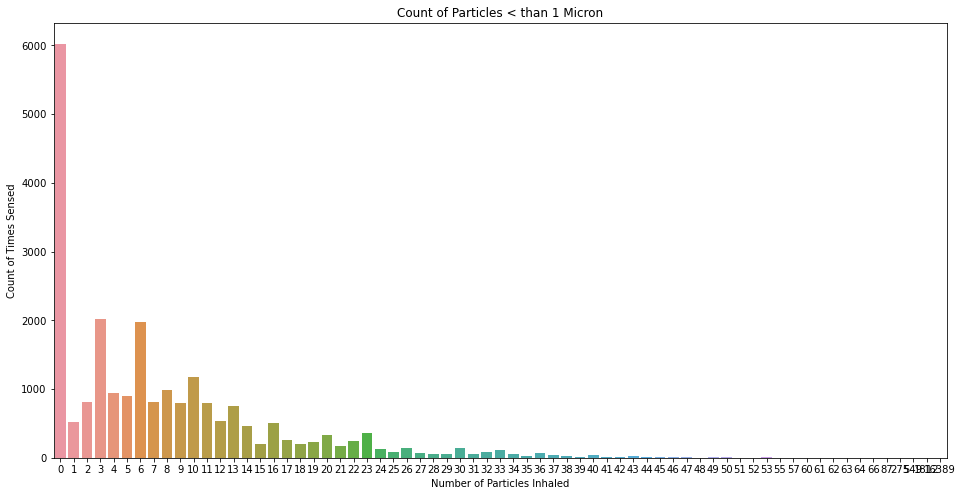

In [71]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

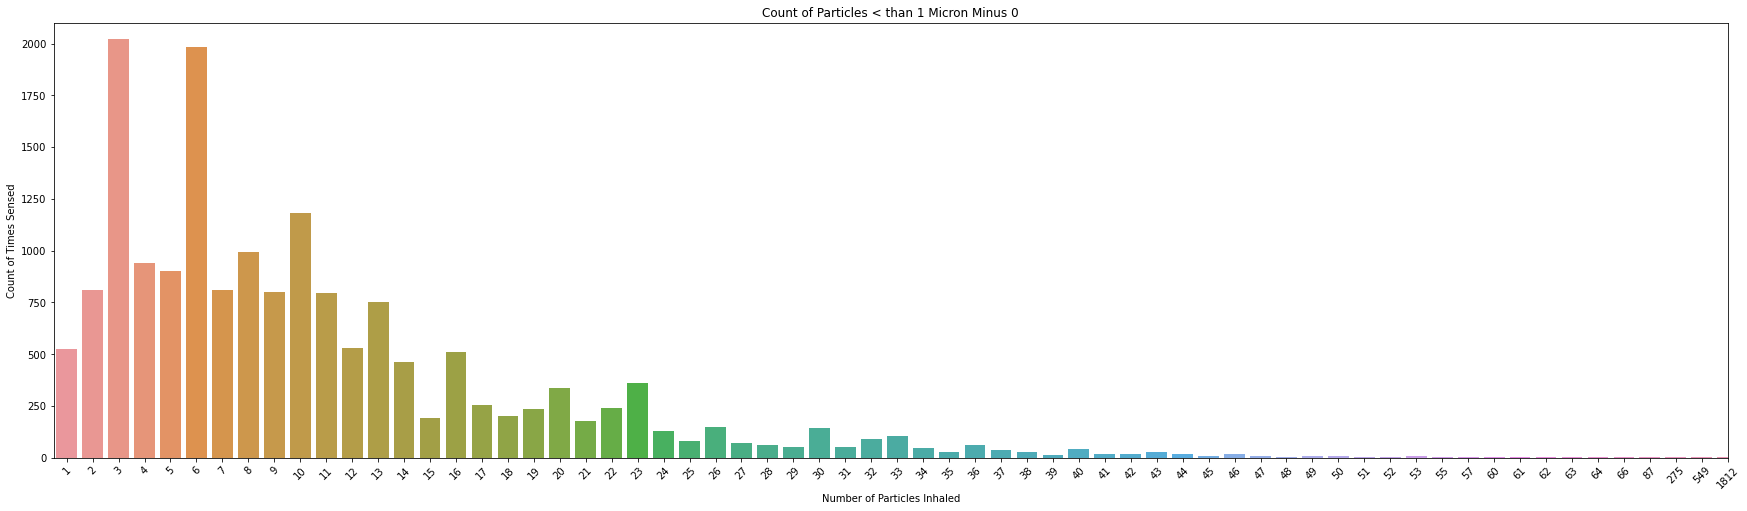

In [72]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(0.5, 65))
plot.set(ylim=(0, 2100))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

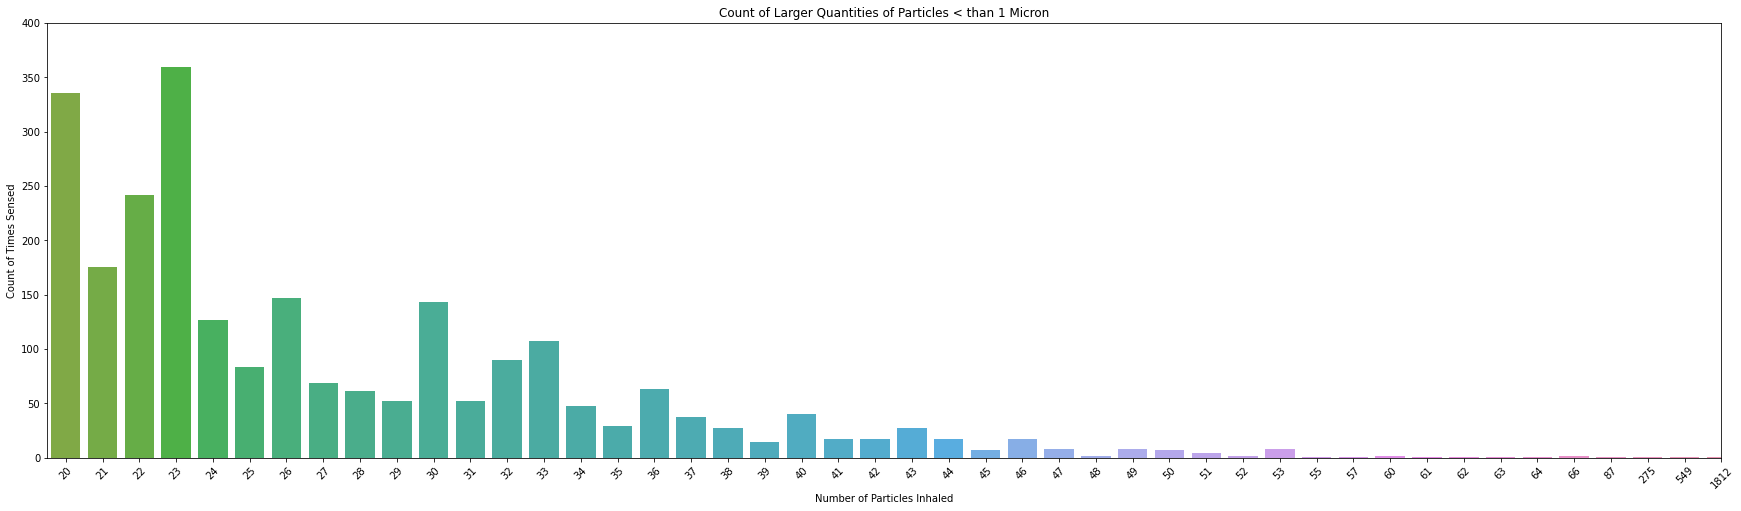

In [73]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(19.5, 65))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [11]:
air.Pm1_0.value_counts()

0        6024
3        2022
6        1982
10       1182
8         992
         ... 
55          1
87          1
16389       1
57          1
63          1
Name: Pm1_0, Length: 67, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 3, 6, 10, and 8
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 50, 43, and 53
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

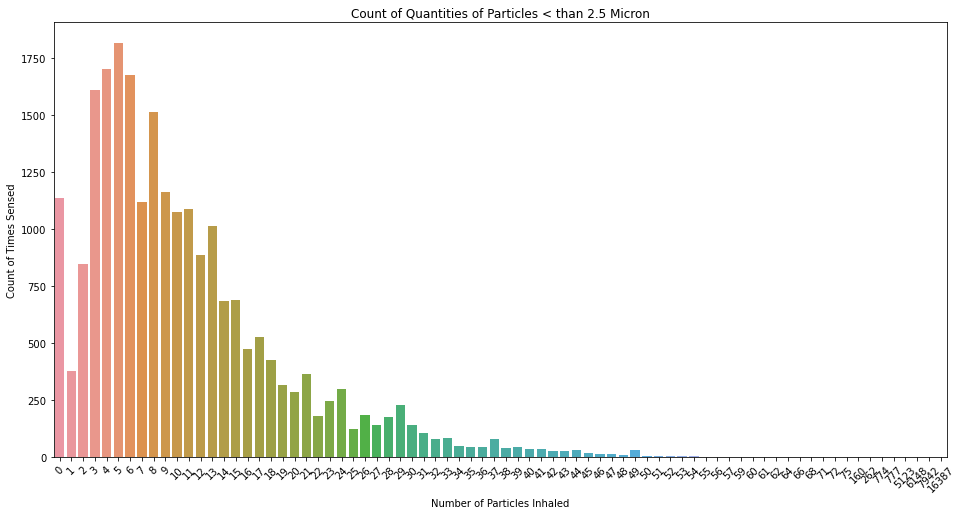

In [81]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm2_5')
plt.xticks(rotation=45)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

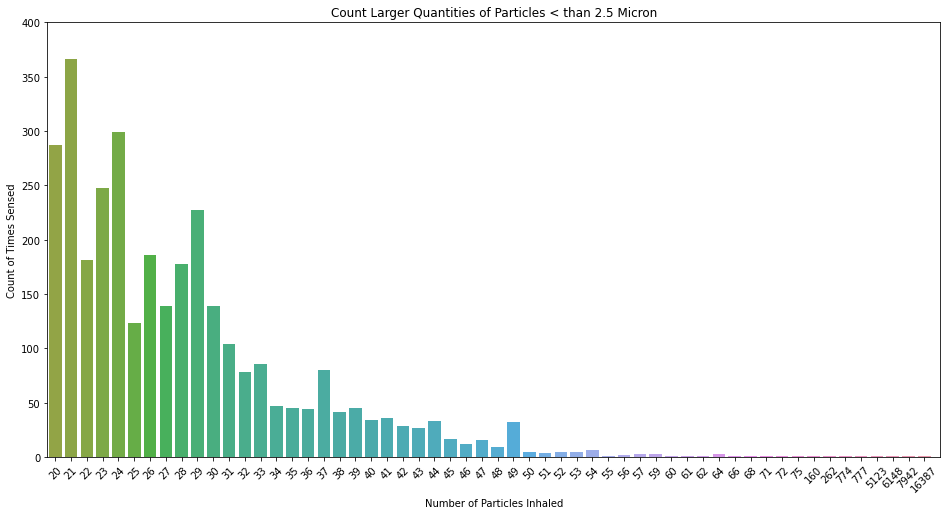

In [82]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='Pm2_5')
plot.set(xlim=(19.5, 76))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [13]:
air.Pm2_5.value_counts()

5       1816
4       1704
6       1674
3       1611
8       1512
        ... 
71         1
55         1
6148       1
62         1
61         1
Name: Pm2_5, Length: 76, dtype: int64

### Takeaways:
- 

___

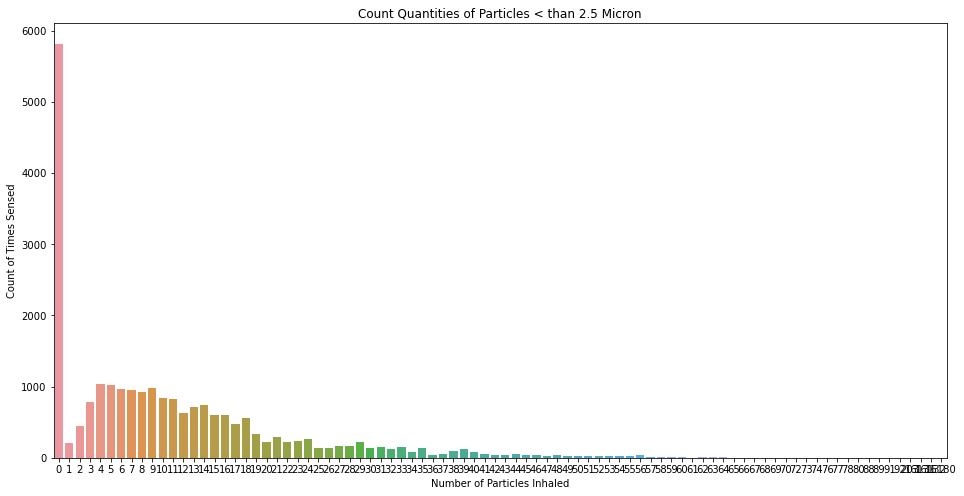

In [83]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

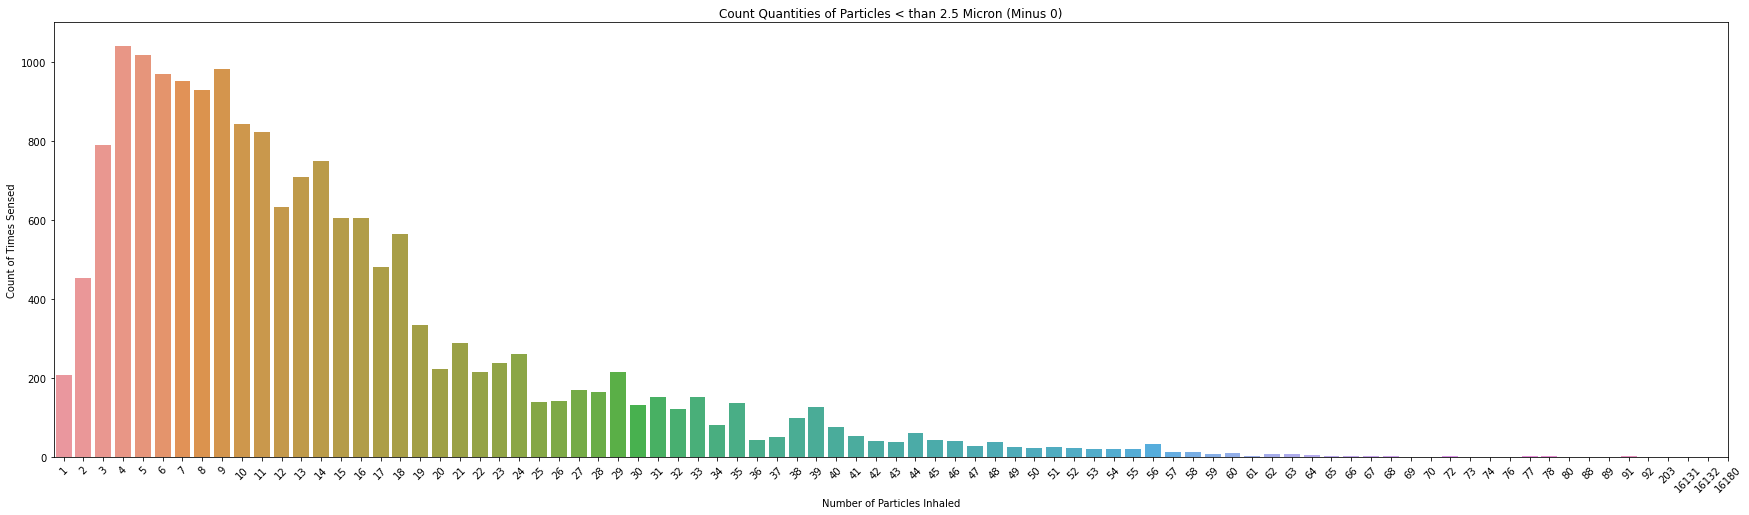

In [85]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(0.5, 85))
plot.set(ylim=(0, 1100))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

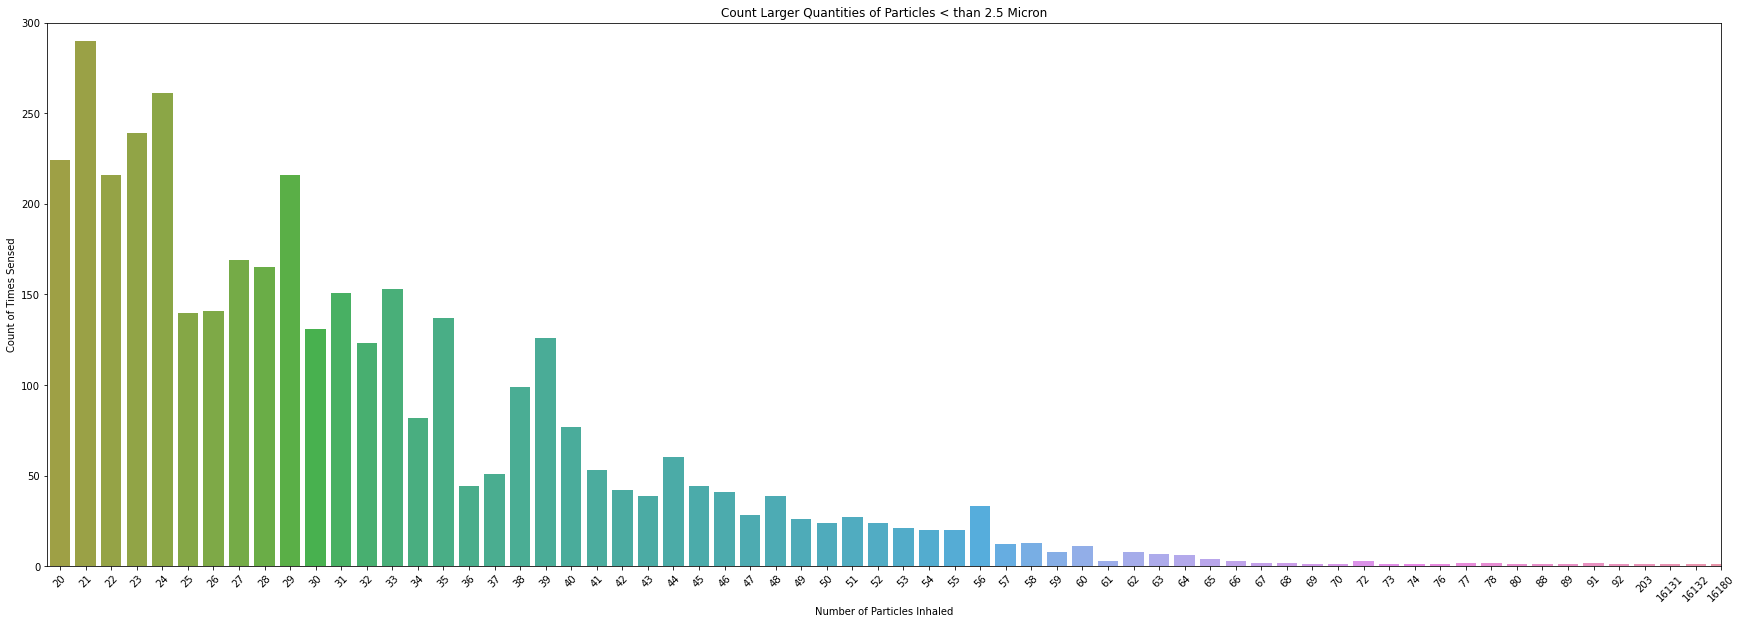

In [88]:
plt.figure(figsize=(30,10))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(19.5, 85))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [16]:
air.Pm10.value_counts()

0        5819
4        1041
5        1018
9         982
6         970
         ... 
16132       1
16180       1
88          1
70          1
74          1
Name: Pm10, Length: 86, dtype: int64

### Takeaways:
-
___

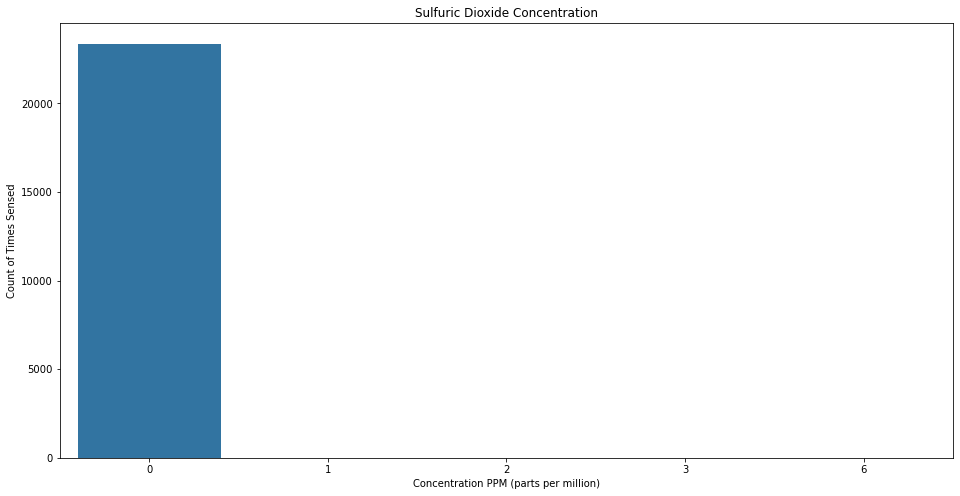

In [89]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

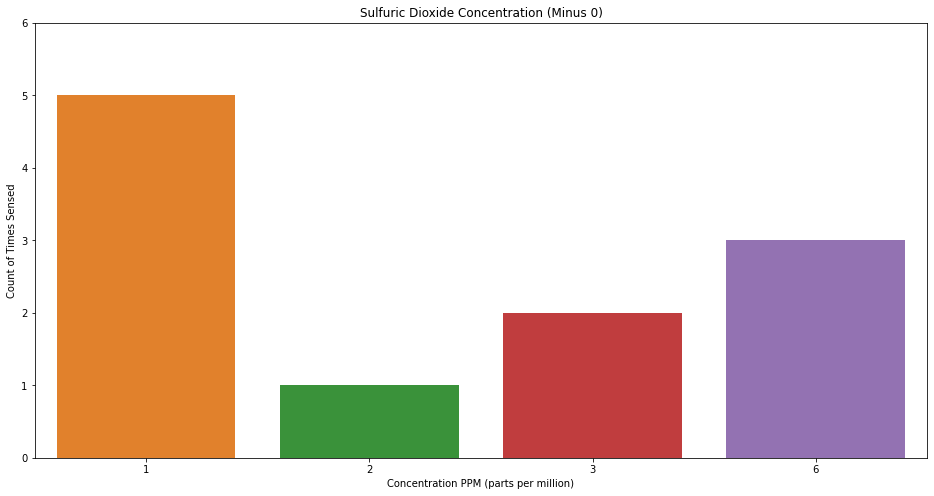

In [91]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='SO2')
plot.set(xlim=(0.5, 4.5))
plot.set(ylim=(0, 6))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [18]:
air.SO2.value_counts()

0    23368
1        5
6        3
3        2
2        1
Name: SO2, dtype: int64

### Takeaways:
-

___

Text(0, 0.5, 'Count of Times Sensed')

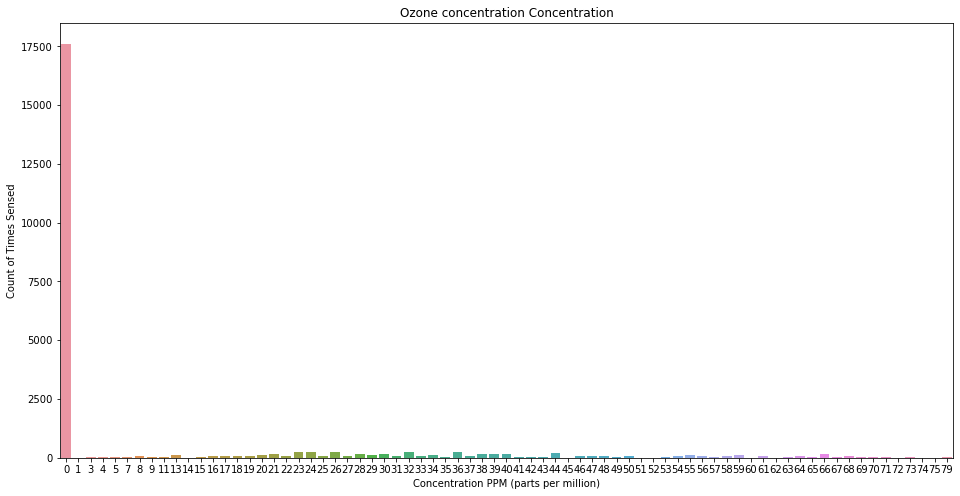

In [92]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='O3')
plt.title('Ozone concentration Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

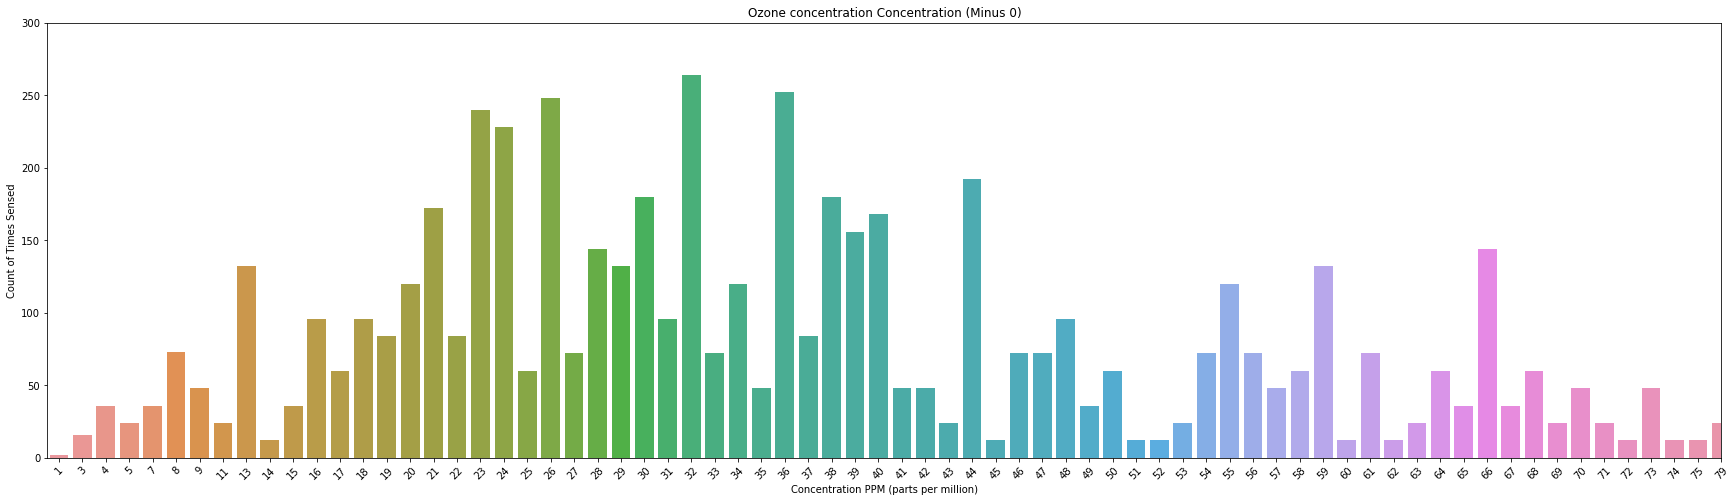

In [93]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='O3')
plot.set(xlim=(0.5, 72))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Ozone concentration Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [21]:
air.O3.value_counts()

0     17612
32      264
36      252
26      248
23      240
      ...  
74       12
14       12
52       12
45       12
1         2
Name: O3, Length: 73, dtype: int64

### Takeaways:
- 

___ 

Text(0, 0.5, 'Count of Times Sensed')

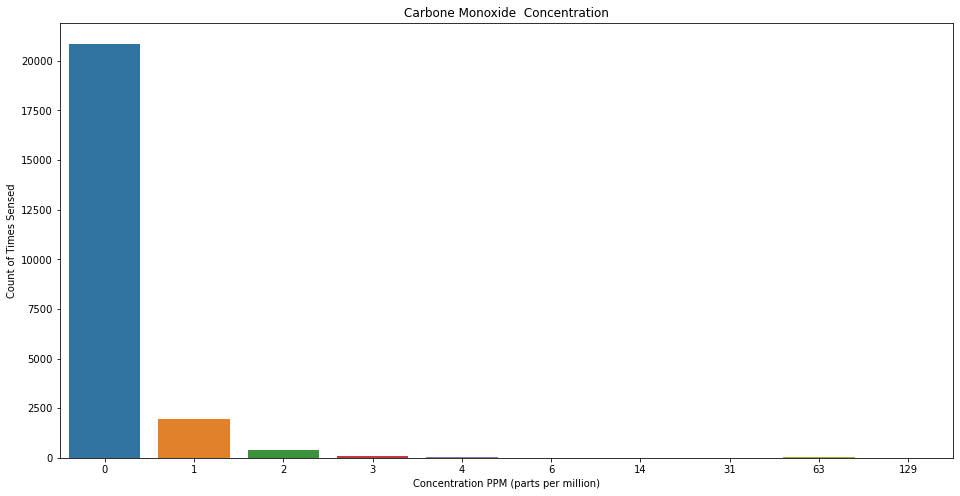

In [94]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

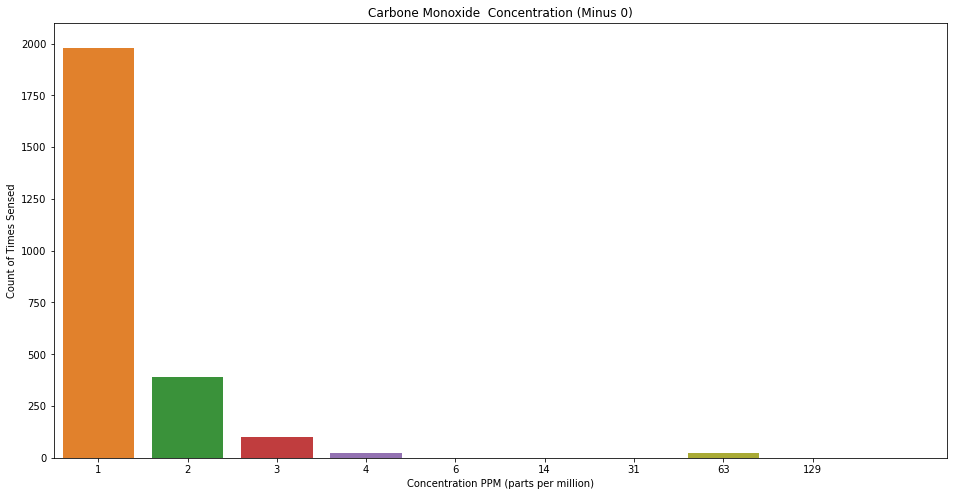

In [95]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 2100))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [23]:
air.CO.value_counts()

0      20861
1       1978
2        391
3        102
4         22
63        21
31         1
14         1
6          1
129        1
Name: CO, dtype: int64

### Takeaways:
- 

___

<AxesSubplot:xlabel='NO2', ylabel='count'>

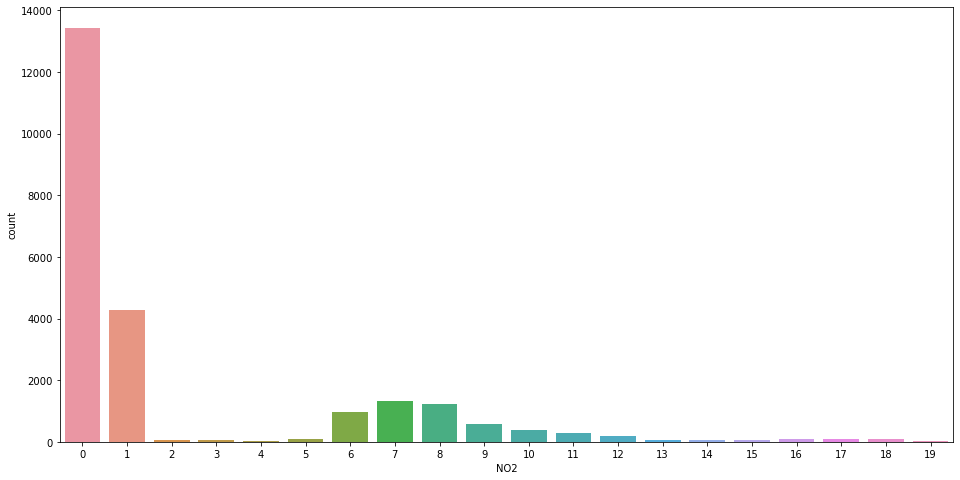

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

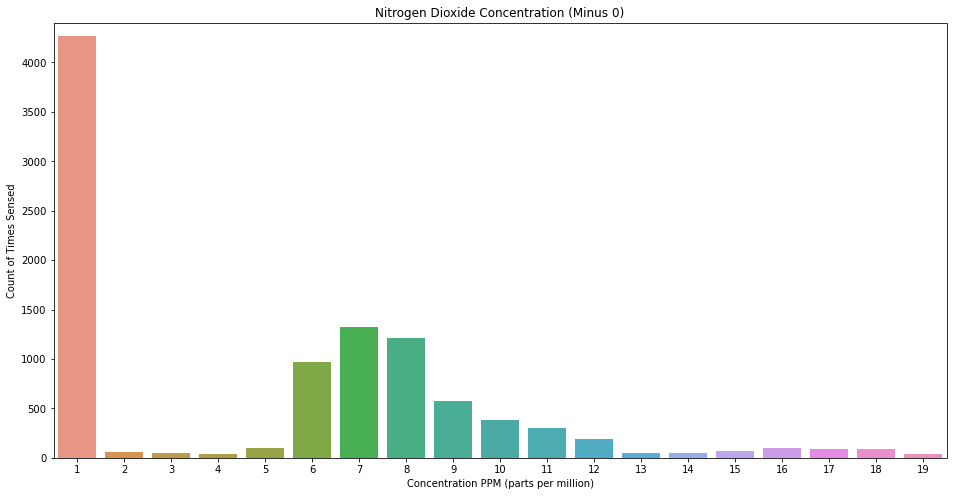

In [96]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 4400))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [25]:
air.NO2.value_counts()

0     13442
1      4271
7      1320
8      1212
6       972
9       576
10      384
11      300
12      192
16       96
5        96
18       84
17       84
15       72
2        60
14       49
13       49
3        48
4        36
19       36
Name: NO2, dtype: int64

### Takeaways:
- 

___

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

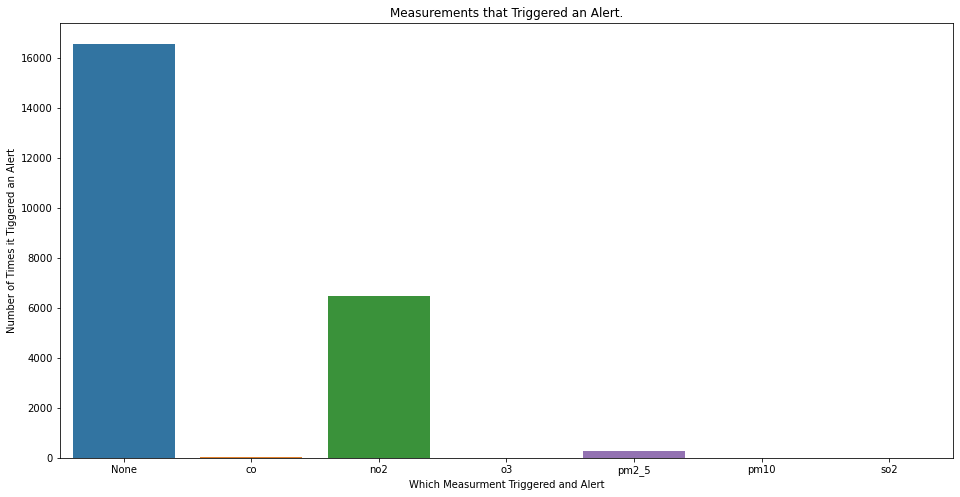

In [97]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='alert_triggered')
plt.title('Measurements that Triggered an Alert.')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

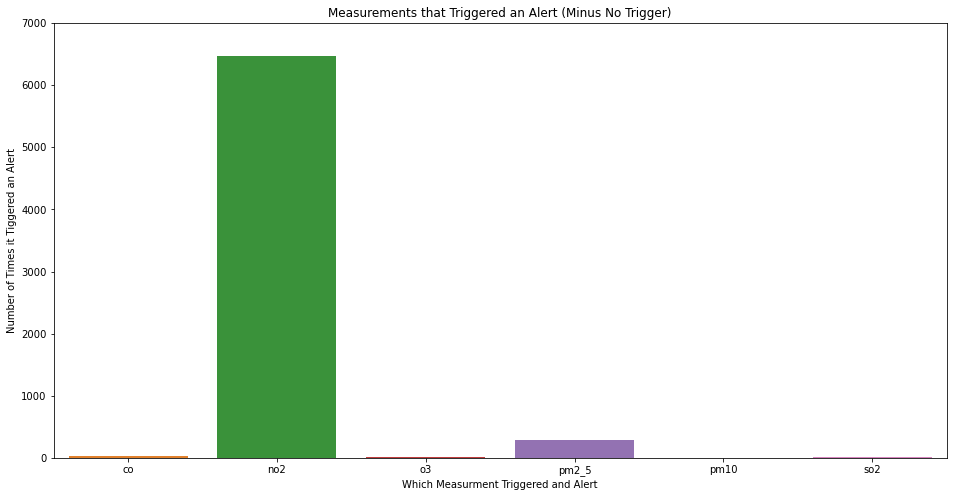

In [102]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 7000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [103]:
air.alert_triggered.value_counts()

None     16576
no2       6464
pm2_5      292
co          24
so2         13
o3           7
pm10         3
Name: alert_triggered, dtype: int64

### Takeaways:
- 

___